In [2]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

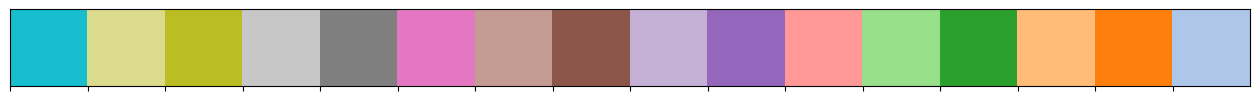

In [3]:
colors = sns.color_palette("tab20_r", 16)
sns.palplot(colors)
sns.set_style("darkgrid")

In [39]:
def plot_loss(hist, title):

    train_acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    train_loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    
    data = {'Epoch': range(1, len(train_acc) + 1),
        'Training Accuracy': train_acc,
        'Validation Accuracy': val_acc,
           'Training Loss':train_loss,
           'Validation Loss':val_loss}
    df = pd.DataFrame(data)
    
    fig, ax = plt.subplots(figsize=(18,12))
    
    fig.suptitle(title, fontsize=20)
    
    sns.lineplot(ax=ax,data=df, x='Epoch', y='Training Loss', label='Training Loss')
    sns.lineplot(ax=ax,data=df, x='Epoch', y='Validation Loss', label='Validation Loss')
    
    ax.legend()
    
    
    return fig

In [40]:
def plot_accuracy(hist, title):

    train_acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    train_loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    
    data = {'Epoch': range(1, len(train_acc) + 1),
        'Training Accuracy': train_acc,
        'Validation Accuracy': val_acc}
    df = pd.DataFrame(data)
    
    fig, ax = plt.subplots(figsize=(18,12))
    
    fig.suptitle(title, fontsize=20)
    
    sns.lineplot(ax=ax,data=df, x='Epoch', y='Training Accuracy', label='Training Accuracy')
    sns.lineplot(ax=ax,data=df, x='Epoch', y='Validation Accuracy', label='Validation Accuracy')
    
    ax.legend()
    
    
    return fig,df

# Import data

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


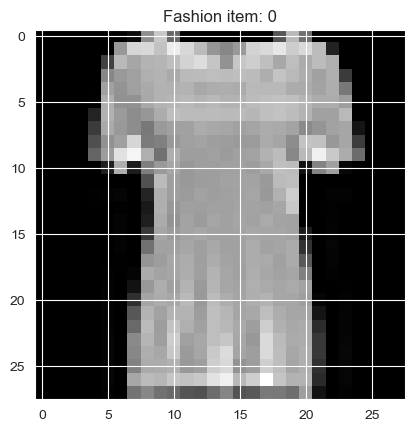

In [8]:
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(x_test.shape)   # (10000, 28, 28)
print(y_test.shape)   # (10000,)

# Access a specific image and label
image_index = 10
image = x_train[image_index]
label = y_train[image_index]

plt.imshow(image, cmap='gray')
plt.title(f"Fashion item: {label}")
plt.show()


In [9]:
image

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

### Data output 

In [15]:
classification = {
    0: "",
}

# NEURAL NETWORK EXPLORATION

Important points
For every neural network project you will do in the future, these rules always apply.

-> Start simple. Use a single layer perceptron and evaluate the result. 

-> If it is good, then proceed to deployment.

-> If the previous step is not good enough, try to get your network wider and/or deeper. Add several neurons in your single-layer perceptron. Or, add one layer into the existing network. 

-> Evaluate and, if it is good, proceed to deployment. 

-> If not, then iterate by adding more neurons or layers.
When, after adding several more layers into your network, but the results are still not good, then maybe you need to change your network architecture. 

-> Use Convolutional Neural Network (CNN) for images or Recurring Neural Network for time-series and texts.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

## Perceptron - SImple Model

### Reshape it for 1D-array

In [12]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
print(x_train.shape)

(60000, 784)


### Creation of Model

In [41]:
def init_model_1():
    
    model = Sequential()
    model.add(Dense(10, input_dim=784, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [42]:
model_1 = init_model_1()

In [43]:
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train model

In [44]:
with tf.device('/CPU:0'):
    history_1 = model_1.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
  16/1688 [..............................] - ETA: 11s - loss: 2.2331 - accuracy: 0.2539

2023-05-24 16:44:47.989356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1681/1688 [============================>.] - ETA: 0s - loss: 0.6842 - accuracy: 0.7658

2023-05-24 16:44:58.941609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 12s 7ms/step - loss: 0.6834 - accuracy: 0.7661 - val_loss: 0.5056 - val_accuracy: 0.8265
Epoch 2/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.4682 - accuracy: 0.8375 - val_loss: 0.4423 - val_accuracy: 0.8450
Epoch 3/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.4352 - accuracy: 0.8476 - val_loss: 0.4249 - val_accuracy: 0.8482
Epoch 4/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.4181 - accuracy: 0.8536 - val_loss: 0.4104 - val_accuracy: 0.8542
Epoch 5/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.4056 - accuracy: 0.8579 - val_loss: 0.4407 - val_accuracy: 0.8413
Epoch 6/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.3956 - accuracy: 0.8611 - val_loss: 0.4093 - val_accuracy: 0.8553
Epoch 7/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3887 - accuracy: 0.8644 - val_loss: 0.4029 - val_accuracy: 0.8

### Test

In [30]:
_, test_acc = model_1.evaluate(x_test, y_test)
print(test_acc)

 11/313 [>.............................] - ETA: 3s - loss: 0.3732 - accuracy: 0.8551

2023-05-24 16:33:30.335391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 11ms/step - loss: 0.4565 - accuracy: 0.8407
0.8406999707221985


In [36]:
print("First Simple Model Accuray is --> ", test_acc)

First Simple Model Accuray is -->  0.8406999707221985


### Analysis

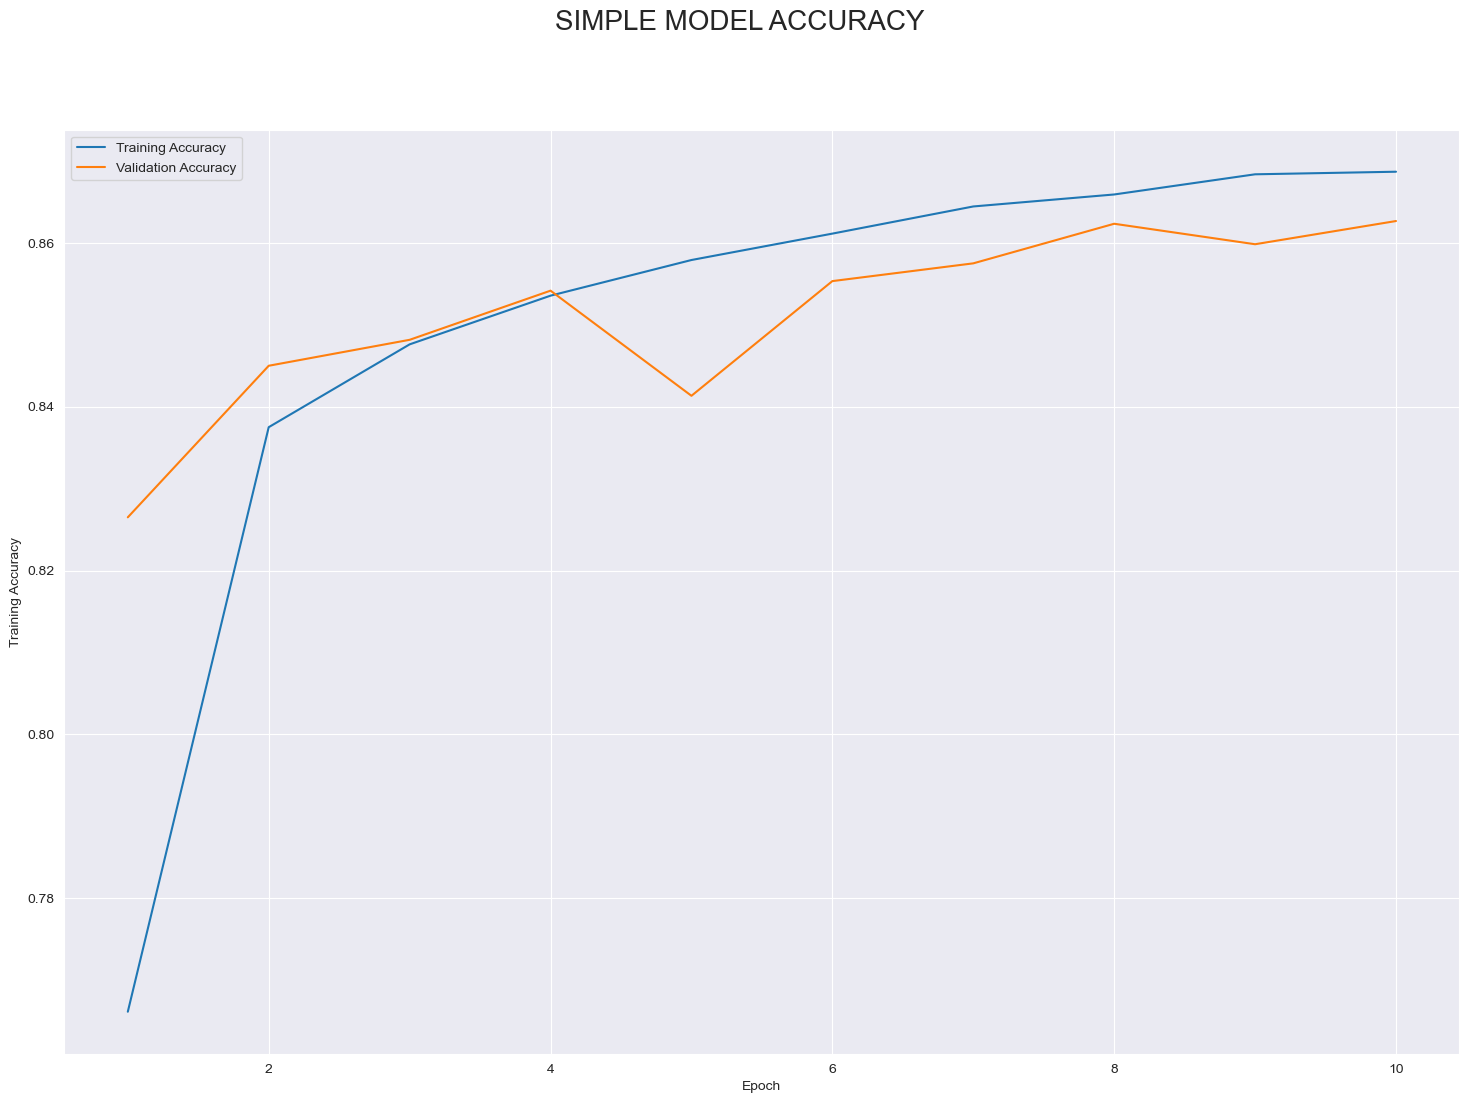

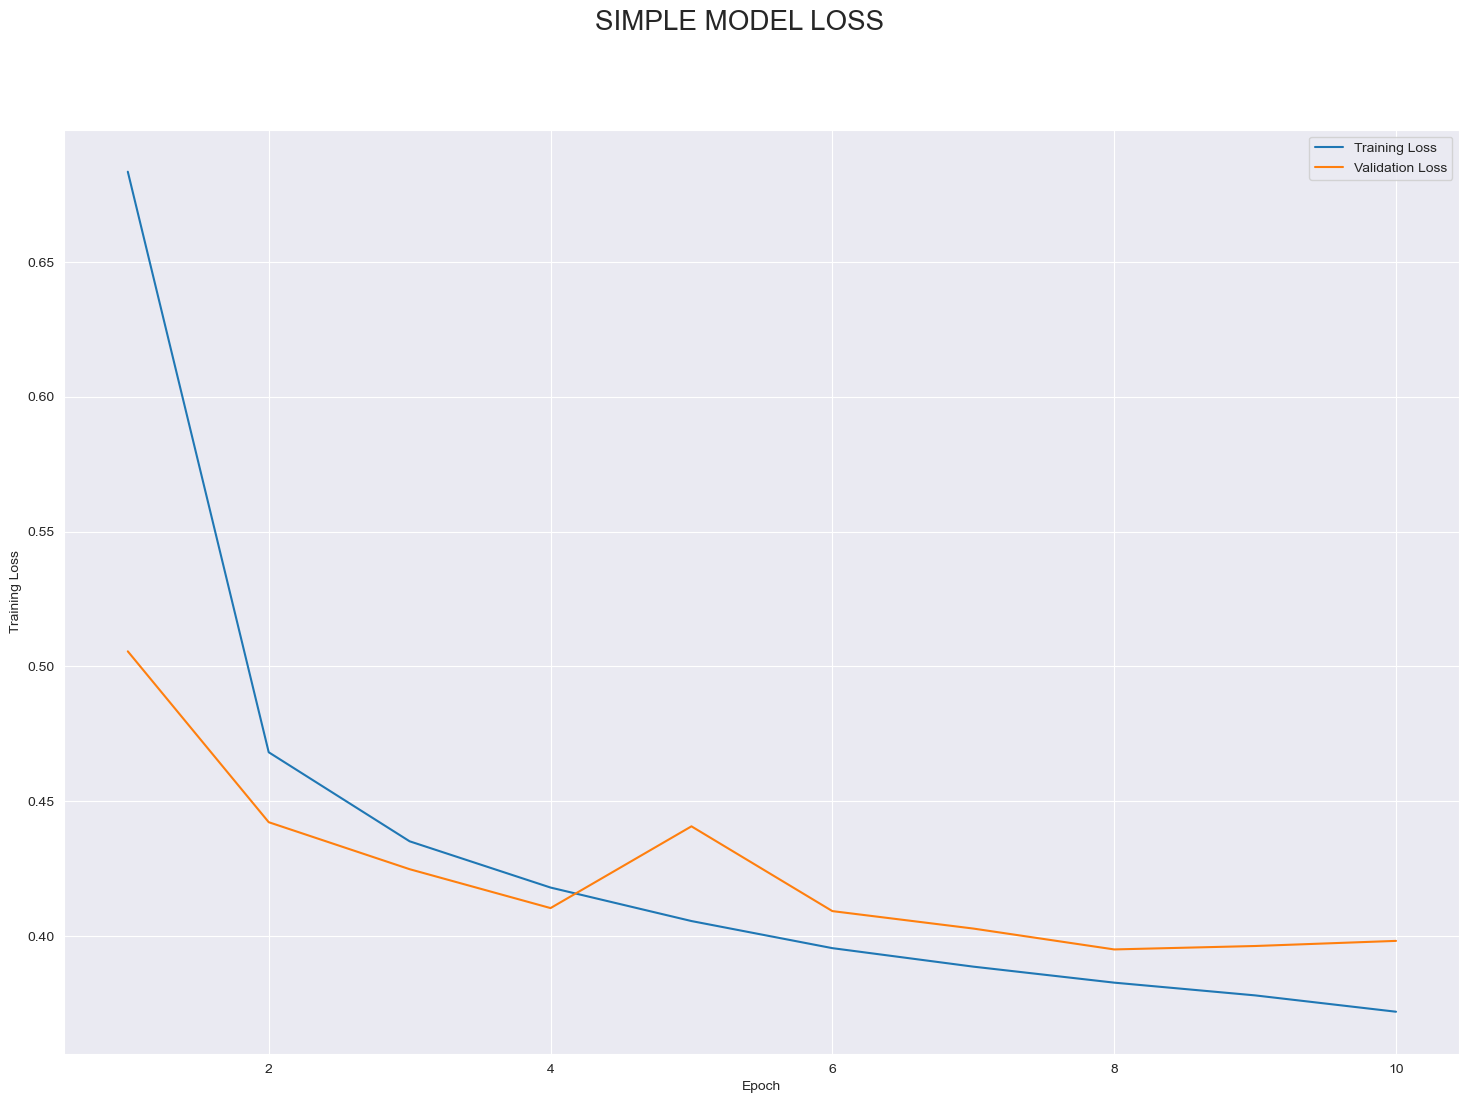

In [45]:
fig = plot_accuracy(history_1, "SIMPLE MODEL ACCURACY")
fig = plot_loss(history_1, "SIMPLE MODEL LOSS")

## Second Model - Wider

- On augmente la taille de la première couche de 10 à 50 neurones
- Le model est plus Wide

In [46]:
def init_model_2():
    
    model2 = Sequential()
    model2.add(Dense(50, input_dim=784, activation='relu'))
    model2.add(Dense(10, activation='softmax'))
    
    return model2

In [47]:
model_2 = init_model_2()
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train wider Model

In [48]:
with tf.device('/CPU:0'):
    history_2 = model_2.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
  17/1688 [..............................] - ETA: 11s - loss: 1.9053 - accuracy: 0.3364    

2023-05-24 16:47:43.453928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1682/1688 [============================>.] - ETA: 0s - loss: 0.5463 - accuracy: 0.8111

2023-05-24 16:47:54.011341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 11s 7ms/step - loss: 0.5463 - accuracy: 0.8111 - val_loss: 0.4289 - val_accuracy: 0.8473
Epoch 2/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4155 - accuracy: 0.8531 - val_loss: 0.3964 - val_accuracy: 0.8553
Epoch 3/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3755 - accuracy: 0.8642 - val_loss: 0.3664 - val_accuracy: 0.8657
Epoch 4/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3491 - accuracy: 0.8735 - val_loss: 0.3595 - val_accuracy: 0.8740
Epoch 5/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3293 - accuracy: 0.8812 - val_loss: 0.3574 - val_accuracy: 0.8717
Epoch 6/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3148 - accuracy: 0.8843 - val_loss: 0.3762 - val_accuracy: 0.8678
Epoch 7/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3016 - accuracy: 0.8901 - val_loss: 0.3547 - val_accuracy: 0.8

### Analysis

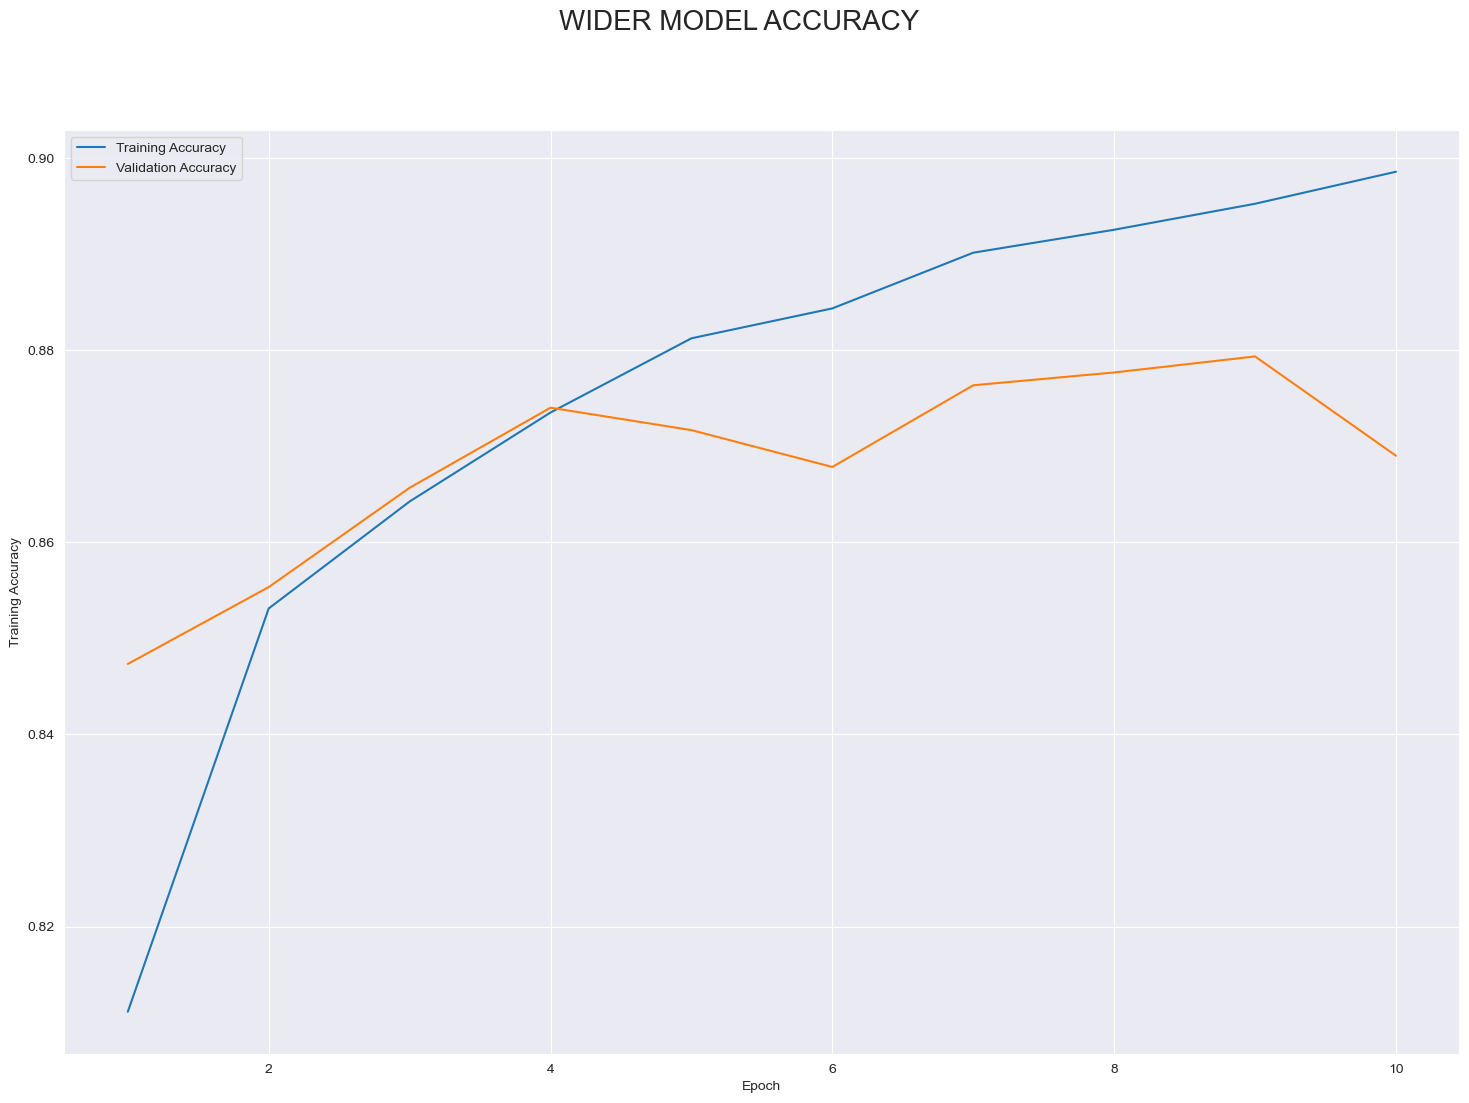

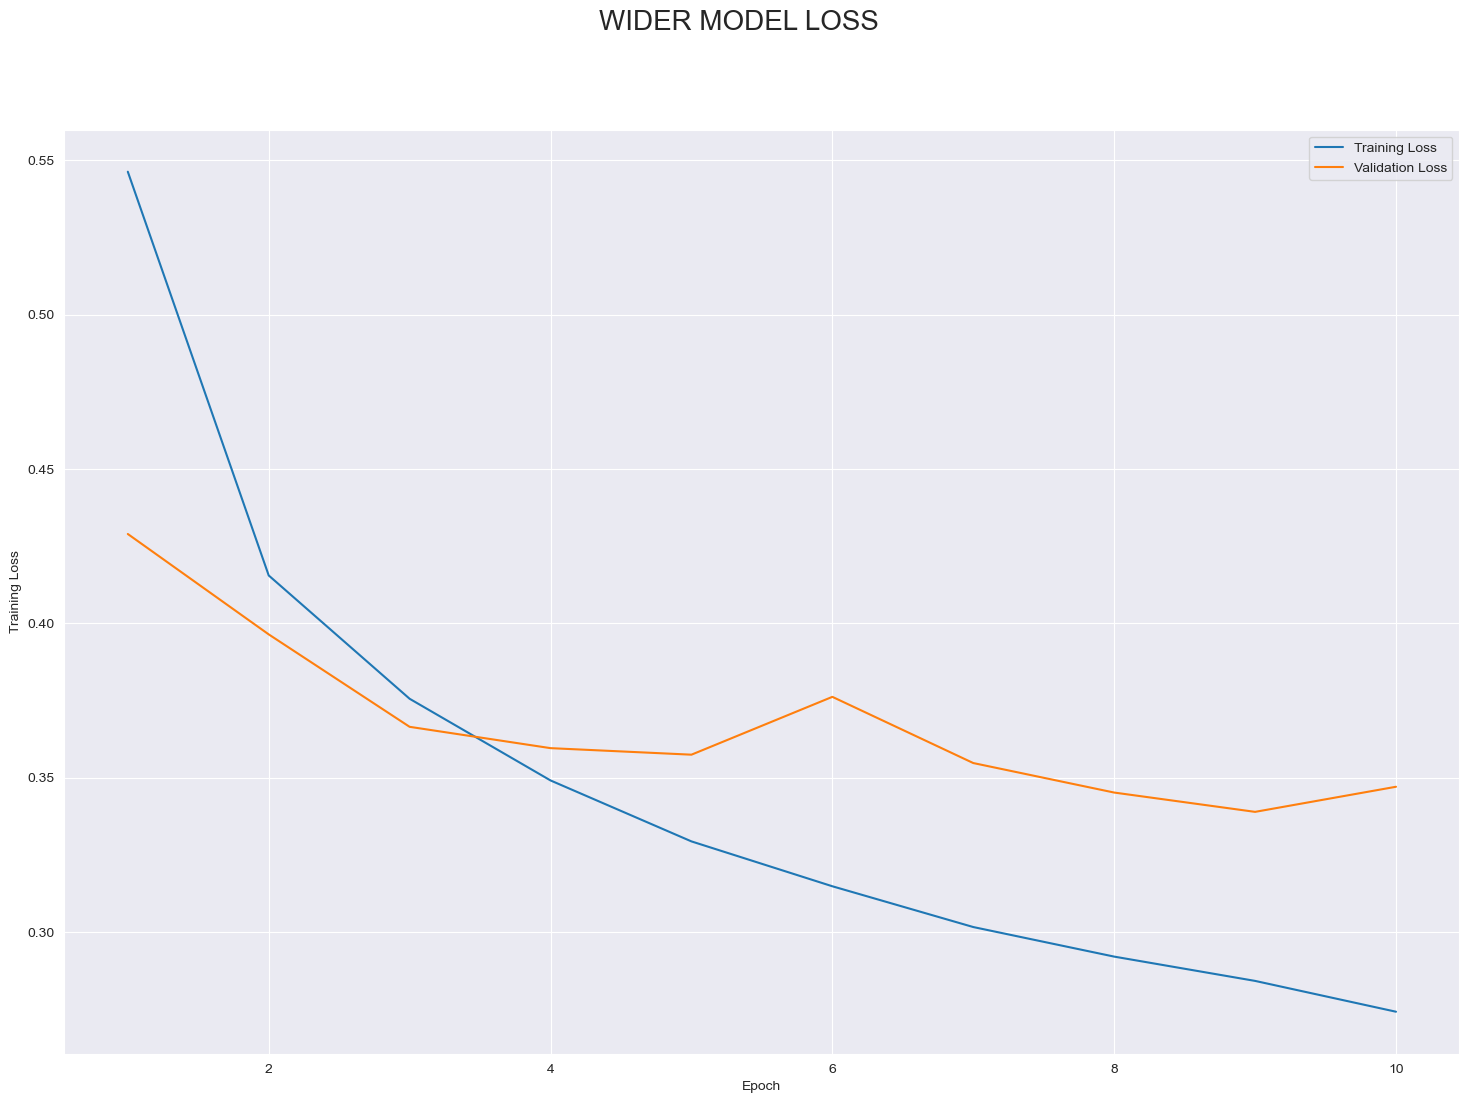

In [63]:
fig = plot_accuracy(history_2, "WIDER MODEL ACCURACY")
fig = plot_loss(history_2, "WIDER MODEL LOSS")

### Results

In [50]:
_, test_acc = model_2.evaluate(x_test, y_test)
print(test_acc)

 11/313 [>.............................] - ETA: 3s - loss: 0.3151 - accuracy: 0.8807

2023-05-24 16:49:44.146397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 12ms/step - loss: 0.3700 - accuracy: 0.8656
0.8655999898910522


In [52]:
print("First WIDER Model Accuray is --> ", test_acc)

First WIDER Model Accuray is -->  0.8655999898910522


## Deeper Model

- On va augmenter le nombre de couche de neurone
- Le model devient plus deep

In [58]:
def init_model_3():
    model3 = Sequential()
    model3.add(Dense(50, input_dim=784, activation='relu'))
    model3.add(Dense(50, activation='relu'))
    model3.add(Dense(10, activation='softmax'))

    return model3

In [59]:
model_3 = init_model_3()
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
with tf.device('/CPU:0'):
    history_3 = model_3.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1686/1688 [============================>.] - ETA: 0s - loss: 0.3997 - accuracy: 0.8564

2023-05-24 16:53:37.059345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 15s 9ms/step - loss: 0.3996 - accuracy: 0.8564 - val_loss: 0.4005 - val_accuracy: 0.8535
Epoch 2/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.3612 - accuracy: 0.8673 - val_loss: 0.3592 - val_accuracy: 0.8660
Epoch 3/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.3381 - accuracy: 0.8764 - val_loss: 0.3464 - val_accuracy: 0.8698
Epoch 4/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.3182 - accuracy: 0.8825 - val_loss: 0.3513 - val_accuracy: 0.8753
Epoch 5/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.3062 - accuracy: 0.8877 - val_loss: 0.3577 - val_accuracy: 0.8662
Epoch 6/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2968 - accuracy: 0.8907 - val_loss: 0.3425 - val_accuracy: 0.8727
Epoch 7/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2842 - accuracy: 0.8945 - val_loss: 0.3415 - val_accuracy: 0.8

### Analysis

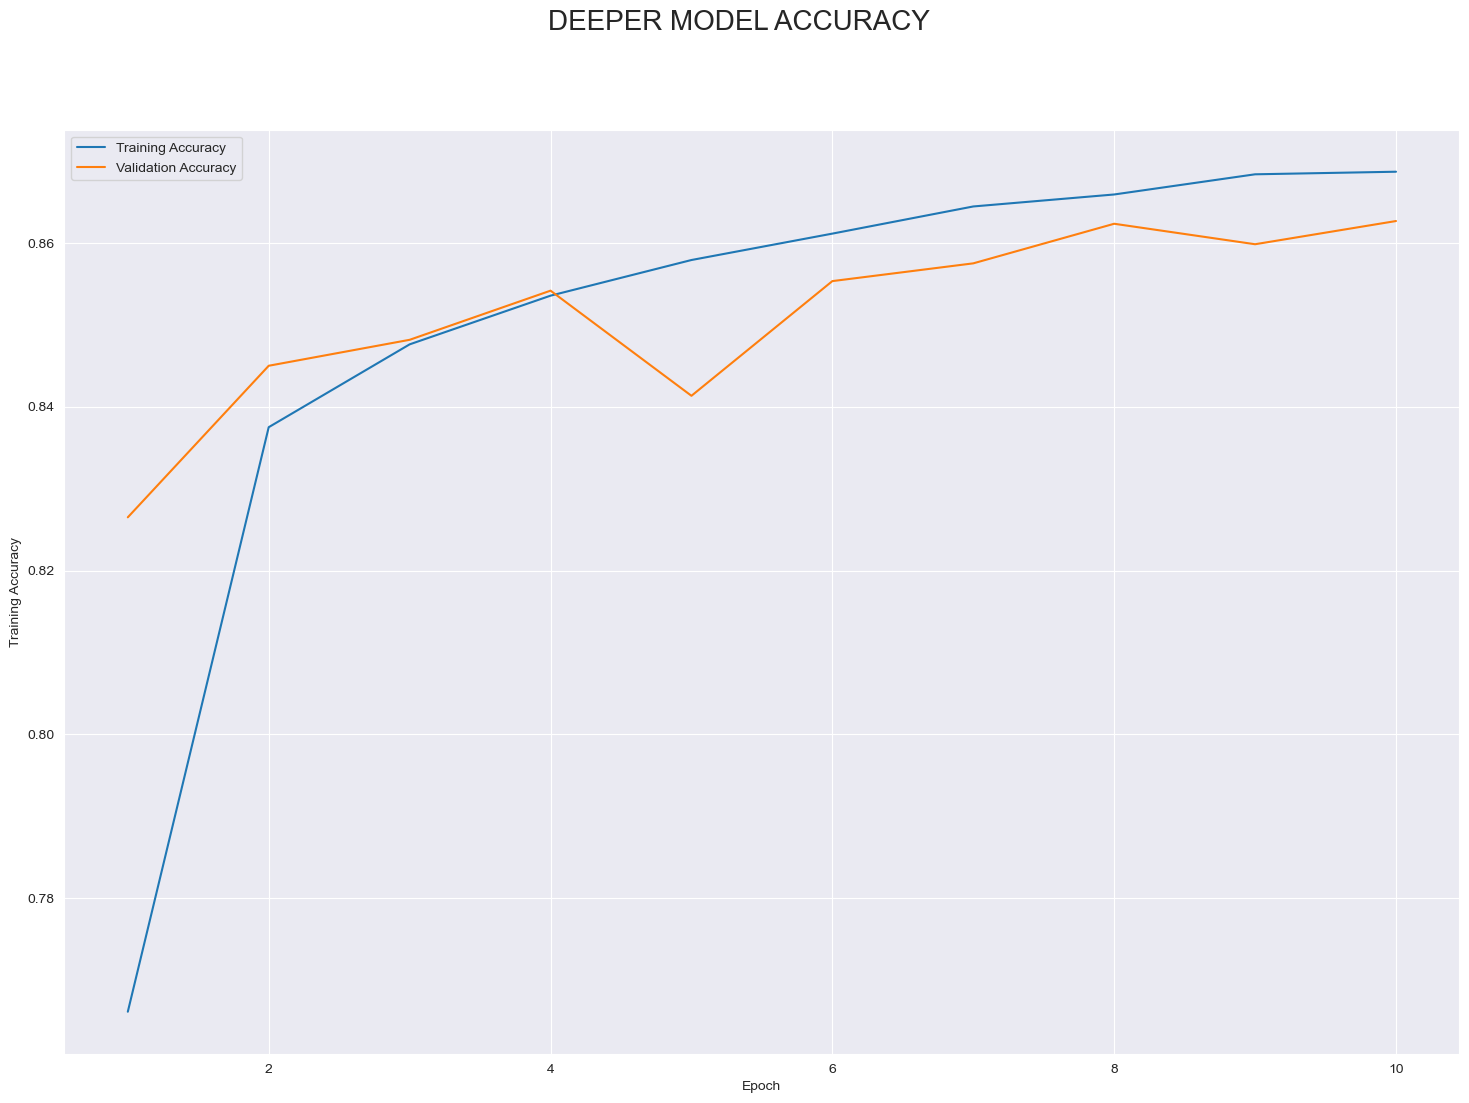

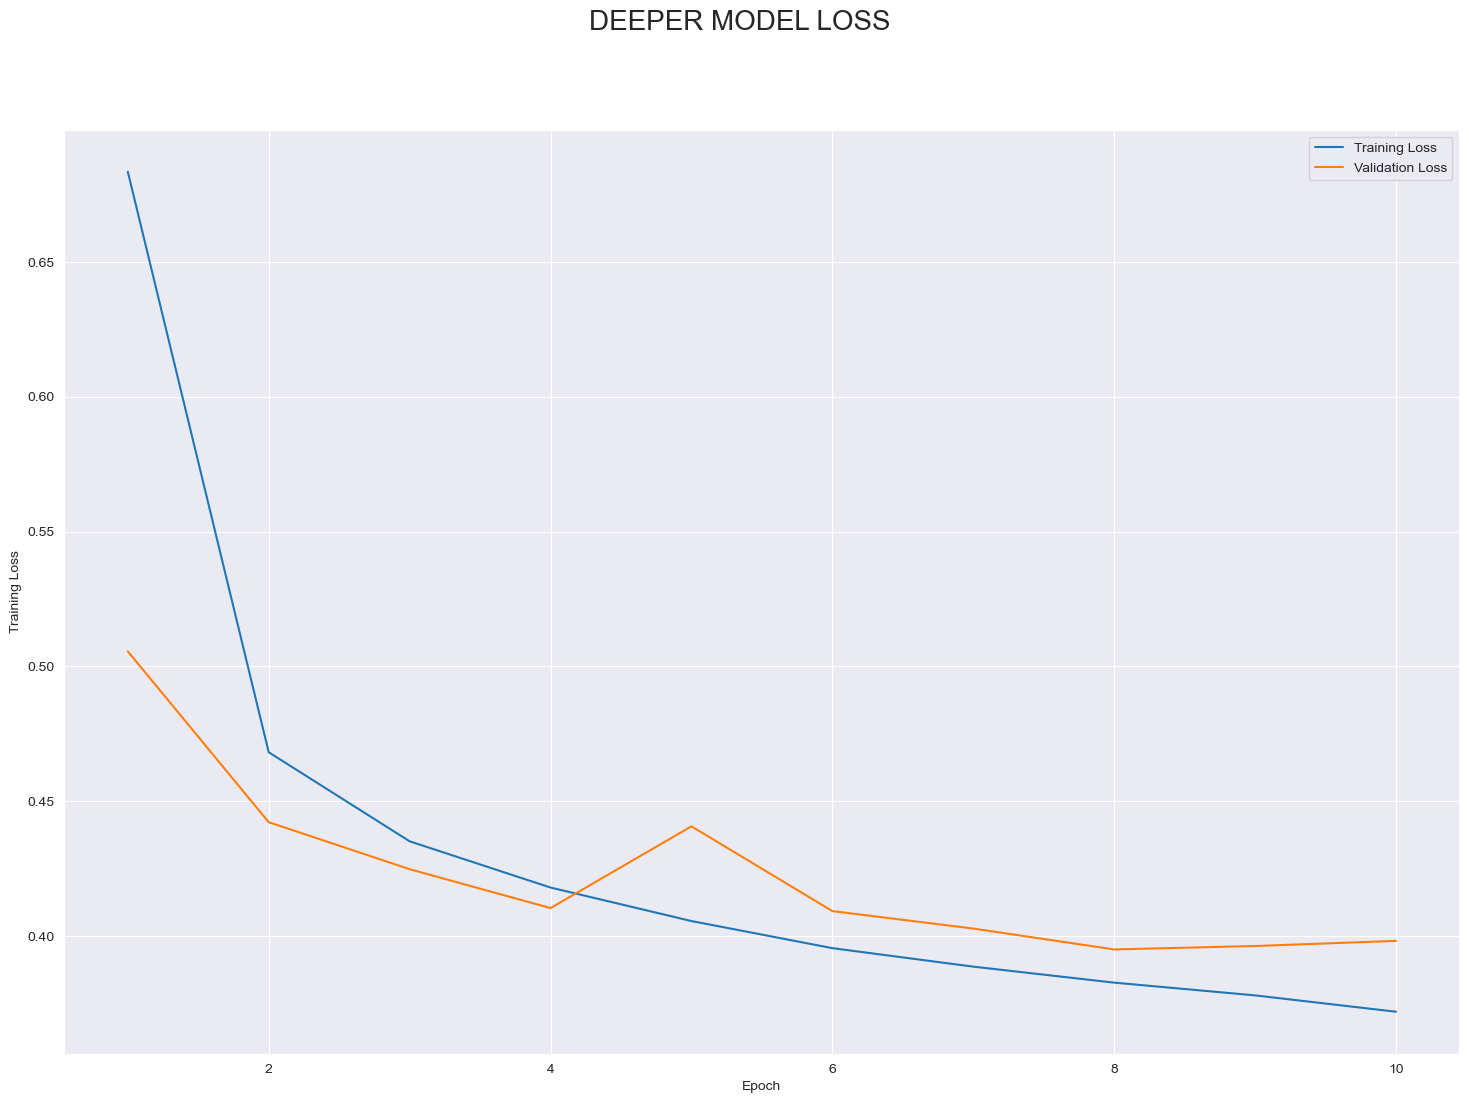

In [68]:
fig = plot_accuracy(history_1, "DEEPER MODEL ACCURACY")
fig = plot_loss(history_1, "DEEPER MODEL LOSS")

### Results

In [65]:
_, test_acc = model_3.evaluate(x_test, y_test)
print(test_acc)

 10/313 [..............................] - ETA: 3s - loss: 0.2938 - accuracy: 0.8938

2023-05-24 16:57:10.963500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 11ms/step - loss: 0.3456 - accuracy: 0.8795
0.8794999718666077


In [67]:
print("First DEEPER Model Accuray is --> ", test_acc)

First DEEPER Model Accuray is -->  0.8794999718666077


# CONVULATIONAL NEURAL NETWORK

## Reload data because the flatten shape is not the good one for CNN

In [70]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:,:,:,np.newaxis] / 255.0
x_test = x_test[:,:,:,np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Create Model

In [74]:
def init_model_4():
    
    model4 = Sequential()
    model4.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))) 
    model4.add(MaxPooling2D(pool_size=2))
    model4.add(Flatten())
    model4.add(Dense(10, activation='softmax'))
    
    return model4

In [75]:
model_4 = init_model_4()

NameError: name 'Conv2D' is not defined

In [76]:
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: name 'model_4' is not defined